## <font color="maroon"><h4 align="center">Handling Missing Data - fillna, interpolate, dropna</font>

In [18]:
#data cleaning/data munging
import pandas as pd
#df = pd.read_csv("weather_data_missing.csv")
df = pd.read_csv("weather_data_missing.csv",parse_dates=['day'])
#df = pd.read_csv("weather_data_missing.csv",index_col='day',parse_dates=['day'])
#df = pd.read_csv("weather_data_missing.csv",skiprows =3,parse_dates=['day'])

df


,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-10,34.0,8.0,Cloudy
7,2017-01-11,40.0,12.0,Sunny
8,2017-04-11,34.0,10.0,NaN
9,2017-05-11,NaN,NaN,NaN


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   day          8 non-null      datetime64[ns]
 1   temperature  5 non-null      float64       
 2   windspeed    5 non-null      float64       
 3   event        7 non-null      object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 384.0+ bytes


In [8]:
#to overwrite the original dataframe with new index column
df.set_index('day',inplace=True)
df1=df.loc["01-07-2017"]
print(df1)
df

temperature    32.0
windspeed       NaN
event          Rain
Name: 2017-01-07 00:00:00, dtype: object


,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [9]:
df.reset_index(inplace=True)
df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-10,34.0,8.0,Cloudy
7,2017-01-11,40.0,12.0,Sunny


<Axes: >

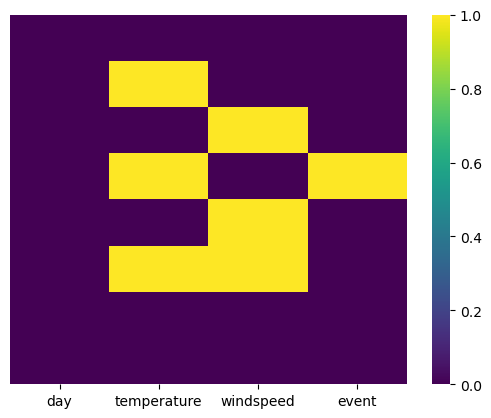

In [14]:
#df.info()
#to check at which row or column values are null
#df2=df.isna()
#df2
#df1=df.isnull()
#df1
#to check how many null values are there 
import seaborn as sns
sns.heatmap(df.isnull(),yticklabels=False,cmap="viridis")
#sns.color_palette("rocket", as_cmap=True)
#sns.heatmap(df.isnull(),yticklabels=False,cmap="YlGnBu")
#to find how many null values are there
#df.isna().sum()

## <font color="blue">fillna</font>

<font color="purple">**Fill all NaN with one specific value**</font>

In [20]:
#thresh= 2 Require that minimum 2 non-NA values.
#df.dropna(inplace=True)
new_df=df.dropna(thresh=2)
#new_df = df.fillna(0)

new_df
#new_df.info()

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-10,34.0,8.0,Cloudy
7,2017-01-11,40.0,12.0,Sunny
8,2017-04-11,34.0,10.0,NaN


<font color="purple">**Fill na using column names and dict**</font>

In [16]:
new_df = df.fillna({
        'temperature': 0,
        'windspeed': 1,
        'event': 'No Event'
    })
new_df


,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-10,34.0,8.0,Cloudy
7,2017-01-11,40.0,12.0,Sunny


In [23]:
#to replace null values with average values
new_df=df.copy()
new_df['temperature'].fillna(new_df['temperature'].mean(),inplace=True)
win_avg=new_df['windspeed'].mean()
new_df['windspeed'].fillna(win_avg,inplace=True)
new_df


,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,33.2,9.0,Sunny
2,2017-01-05,28.0,8.4,Snow
3,2017-01-06,33.2,7.0,NaN
4,2017-01-07,32.0,8.4,Rain
5,2017-01-08,33.2,8.4,Sunny
6,2017-01-10,34.0,8.0,Cloudy
7,2017-01-11,40.0,12.0,Sunny


<font color="purple">**Use method to determine how to fill na values**</font>


In [17]:
df
new_df = df.fillna(method="ffill") #forward fill
new_df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,32.0,9.0,Sunny
2,2017-01-05,28.0,9.0,Snow
3,2017-01-06,28.0,7.0,Snow
4,2017-01-07,32.0,7.0,Rain
5,2017-01-08,32.0,7.0,Sunny
6,2017-01-10,34.0,8.0,Cloudy
7,2017-01-11,40.0,12.0,Sunny


In [18]:
#ffill on specific column
new_df=df.loc[:,'windspeed'].ffill()
new_df


0     6.0
1     9.0
2     9.0
3     7.0
4     7.0
5     7.0
6     8.0
7    12.0
Name: windspeed, dtype: float64

In [24]:
new_df = df.fillna(method="bfill")
new_df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,28.0,9.0,Sunny
2,2017-01-05,28.0,7.0,Snow
3,2017-01-06,32.0,7.0,Rain
4,2017-01-07,32.0,8.0,Rain
5,2017-01-08,34.0,8.0,Sunny
6,2017-01-10,34.0,8.0,Cloudy
7,2017-01-11,40.0,12.0,Sunny


<font color="purple">**Use of axis**</font>

In [20]:
new_df = df.fillna(method="bfill", axis="columns") # axis is either "index" or "columns"
new_df



,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,9.0,9.0,Sunny
2,2017-01-05,28.0,Snow,Snow
3,2017-01-06,7.0,7.0,NaN
4,2017-01-07,32.0,Rain,Rain
5,2017-01-08,Sunny,Sunny,Sunny
6,2017-01-10,34.0,8.0,Cloudy
7,2017-01-11,40.0,12.0,Sunny


<font color="purple">**limit parameter**</font>

In [21]:
#limit will specify how many values should get replace
new_df = df.fillna(method="ffill",limit=2)
#new_df = df.fillna(method="ffill")
new_df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,32.0,9.0,Sunny
2,2017-01-05,28.0,9.0,Snow
3,2017-01-06,28.0,7.0,Snow
4,2017-01-07,32.0,7.0,Rain
5,2017-01-08,32.0,7.0,Sunny
6,2017-01-10,34.0,8.0,Cloudy
7,2017-01-11,40.0,12.0,Sunny


### <font color="blue">interpolate</font>

In [22]:
new_df = df.interpolate()
new_df
new_df = df[['temperature','winspeed']].interpolate()
new_df

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.000000,Rain
1,2017-01-04,30.0,9.000000,Sunny
2,2017-01-05,28.0,8.000000,Snow
3,2017-01-06,30.0,7.000000,NaN
4,2017-01-07,32.0,7.333333,Rain
5,2017-01-08,33.0,7.666667,Sunny
6,2017-01-10,34.0,8.000000,Cloudy
7,2017-01-11,40.0,12.000000,Sunny


In [25]:

df['temperature f']=df['temperature'].map(lambda x:x+10)
df['windspeed f']=df['windspeed'].map(lambda a:a+100)
df




,day,temperature,windspeed,event,temperature f,windspeed f
0,2017-01-01,32.0,6.0,Rain,42.0,106.0
1,2017-01-04,NaN,9.0,Sunny,NaN,109.0
2,2017-01-05,28.0,NaN,Snow,38.0,NaN
3,2017-01-06,NaN,7.0,NaN,NaN,107.0
4,2017-01-07,32.0,NaN,Rain,42.0,NaN
5,2017-01-08,NaN,NaN,Sunny,NaN,NaN
6,2017-01-10,34.0,8.0,Cloudy,44.0,108.0
7,2017-01-11,40.0,12.0,Sunny,50.0,112.0


In [26]:
def myconvert(num):
    if num<30:
        return num+10
    elif num>=30 and num<35:
        return num+20
    else:
        return num+30
    
df['temperature f']=df['temperature'].apply(myconvert) 
df

,day,temperature,windspeed,event,temperature f,windspeed f
0,2017-01-01,32.0,6.0,Rain,52.0,106.0
1,2017-01-04,NaN,9.0,Sunny,NaN,109.0
2,2017-01-05,28.0,NaN,Snow,38.0,NaN
3,2017-01-06,NaN,7.0,NaN,NaN,107.0
4,2017-01-07,32.0,NaN,Rain,52.0,NaN
5,2017-01-08,NaN,NaN,Sunny,NaN,NaN
6,2017-01-10,34.0,8.0,Cloudy,54.0,108.0
7,2017-01-11,40.0,12.0,Sunny,70.0,112.0


**Notice that in above temperature on 2017-01-04 is 29 instead of 30 (in plain linear interpolate)**

**There are many other methods for interpolation such as quadratic, piecewise_polynomial, cubic etc. 
Just google "dataframe interpolate" to see complete documentation**

### <font color="blue">dropna</font>

In [27]:
new_df = df.dropna()    
new_df


,day,temperature,windspeed,event,temperature f,windspeed f
0,2017-01-01,32.0,6.0,Rain,52.0,106.0
6,2017-01-10,34.0,8.0,Cloudy,54.0,108.0
7,2017-01-11,40.0,12.0,Sunny,70.0,112.0


In [25]:
new_df =df.dropna(how='all')
new_df

,day,temperature,windspeed,event,temperature f,windspeed f
0,2017-01-01,32.0,6.0,Rain,42.0,106.0
1,2017-01-04,NaN,9.0,Sunny,NaN,109.0
2,2017-01-05,28.0,NaN,Snow,38.0,NaN
3,2017-01-06,NaN,7.0,NaN,NaN,107.0
4,2017-01-07,32.0,NaN,Rain,42.0,NaN
5,2017-01-08,NaN,NaN,Sunny,NaN,NaN
6,2017-01-10,34.0,8.0,Cloudy,44.0,108.0
7,2017-01-11,40.0,12.0,Sunny,50.0,112.0


In [ ]:
new_df = df.dropna(thresh=3)
new_df
#less that 2 not null values
  

### <font color="blue">Inserting Missing Dates</font>

In [ ]:
dt = pd.date_range("01-01-2017","01-11-2017")
idx = pd.DatetimeIndex(dt)
df.reindex(idx)
df

